In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

#### Loading input files and store the datasets into pandas DataFrames. Combine the DataFrames and name the combinded DataFrame as df_stocks 

Fill the missing value of the 'Open' column by the value of the 'Close' column of previous business day.
Fill the missing value of the 'Close' column by the value of the 'Open' column of the same business day.

In [19]:
amazon = pd.read_csv('AMAZON.csv', usecols= ['Date', 'Open', 'Close'])
apple = pd.read_csv('APPLE.csv', usecols= ['Date', 'Open', 'Close'])
google = pd.read_csv('GOOGLE.csv', usecols= ['Date', 'Open', 'Close'])
microsoft = pd.read_csv('MICROSOFT.csv', usecols= ['Date', 'Open', 'Close'])

In [20]:
amazon['Date'] = pd.to_datetime(amazon['Date'])
amazon.set_index('Date', inplace=True)

apple['Date'] = pd.to_datetime(apple['Date'])
apple.set_index('Date', inplace=True)

google['Date'] = pd.to_datetime(google['Date'])
google.set_index('Date', inplace=True)

microsoft['Date'] = pd.to_datetime(microsoft['Date'])
microsoft.set_index('Date', inplace=True)

In [21]:

df = pd.concat([apple[['Open','Close']], amazon[['Open','Close']], google[['Open','Close']], microsoft[['Open','Close']]], axis=1, keys=['Apple', 'Amazon', 'Google', 'Microsoft'])
df

Apple                 Amazon                Google  \
                  Open       Close       Open      Close       Open   
Date                                                                  
2018-01-02   42.540001   43.064999  58.599998  59.450500  52.417000   
2018-01-03   43.132500   43.057499  59.415001  60.209999  53.215500   
2018-01-04   43.134998   43.257500  60.250000  60.479500  54.400002   
2018-01-05   43.360001   43.750000  60.875500  61.457001  54.700001   
2018-01-08   43.587502   43.587502  61.799999  62.343498  55.111500   
...                ...         ...        ...        ...        ...   
2023-03-07  153.699997  151.600006  94.059998  93.550003  95.419998   
2023-03-08  152.809998  152.869995  93.599998  93.919998  94.404999   
2023-03-09  153.559998  150.589996  93.680000  92.250000  94.489998   
2023-03-10  150.210007  148.500000  92.669998  90.730003  92.500000   
2023-03-13  147.809998  150.470001  89.970001  92.430000  90.565002   

                        Microsoft              
                Close        Open       Close  
Date                                           
2018-01-02  53.250000   86.129997   85.949997  
2018-01-03  54.124001   86.059998   86.349998  
2018-01-04  54.320000   86.589996   87.110001  
2018-01-05  55.111500   87.660004   88.190002  
2018-01-08  55.347000   88.199997   88.279999  
...               ...         ...         ...  
2023-03-07  94.169998  256.299988  254.149994  
2023-03-08  94.650002  254.039993  253.699997  
2023-03-09  92.660004  255.820007  252.320007  
2023-03-10  91.010002  251.080002  248.589996  
2023-03-13  91.660004  247.399994  253.919998  

[1307 rows x 8 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1307 entries, 2018-01-02 to 2023-03-13
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Apple, Open)       1307 non-null   float64
 1   (Apple, Close)      1307 non-null   float64
 2   (Amazon, Open)      1307 non-null   float64
 3   (Amazon, Close)     1307 non-null   float64
 4   (Google, Open)      1307 non-null   float64
 5   (Google, Close)     1307 non-null   float64
 6   (Microsoft, Open)   1307 non-null   float64
 7   (Microsoft, Close)  1307 non-null   float64
dtypes: float64(8)
memory usage: 91.9 KB


#### Show the closing price distribution of Google in 2021.

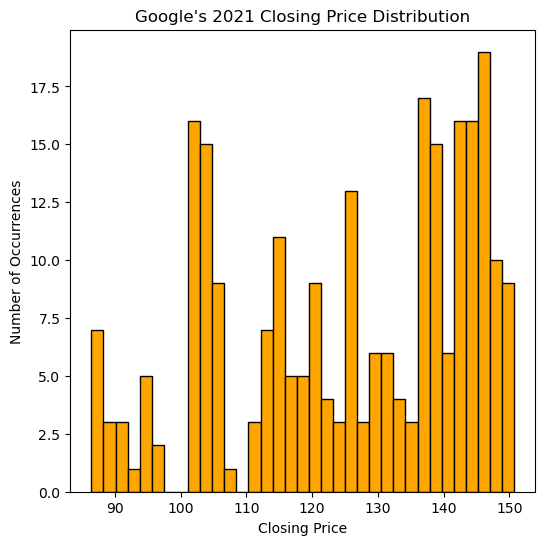

In [23]:
google_2021 = google[google.index.year == 2021]

plt.figure(figsize=(6, 6))
plt.hist(google_2021['Close'], bins=35, color='orange', edgecolor='black')
plt.title("Google's 2021 Closing Price Distribution")
plt.xlabel('Closing Price')
plt.ylabel('Number of Occurrences')

plt.show()

#### Display all companys' opening and closing prices on the day that Google had the highest closing price.

In [24]:
google_max_closing = df['Google', 'Close'].idxmax()
google_max_closing

Timestamp('2021-11-18 00:00:00')

In [25]:
q3 = pd.DataFrame(df.loc[google_max_closing])
q3 = q3.T
q3

Apple                  Amazon                  Google  \
                  Open       Close        Open       Close        Open   
2021-11-18  153.710007  157.869995  178.317505  184.802994  149.145996   

                      Microsoft              
              Close        Open       Close  
2021-11-18  150.709  338.179993  341.269989

#### Find the highest opening and closing prices of Apple and Amazon on each year end

In [26]:
amazon_apple = pd.concat([amazon[['Open','Close']], apple[['Open','Close']]], axis=1, keys=['Amazon', 'Apple'])
q4 = amazon_apple.groupby(amazon_apple.index.year).max()
q4

Amazon                   Apple            
            Open       Close        Open       Close
Date                                                
2018  101.905502  101.975502   57.695000   58.017502
2019  101.280998  101.049500   72.779999   73.412498
2020  177.350006  176.572495  138.050003  136.690002
2021  187.199997  186.570496  181.119995  180.330002
2022  170.438004  170.404495  182.630005  182.009995
2023  110.250000  112.910004  153.880005  155.330002

#### Find the average closing price for each month of Google and Microsoft after 2019.

In [27]:
google_microsoft = pd.concat([google[['Close']], microsoft[['Close']]], axis=1, keys=['Google', 'Microsoft'])

google_microsoft_post_2019 = google_microsoft.loc[google_microsoft.index.year > 2019]

q5 = google_microsoft_post_2019.resample('M').mean()
q5

,Google,Microsoft
,Close,Close
Date,,
2020-01-31,71.832691,163.999046
2020-02-29,73.205526,178.719474
2020-03-31,59.419705,152.554091
2020-04-30,61.707023,169.039525
2020-05-31,69.055687,182.342500
2020-06-30,71.552386,192.699547
2020-07-31,75.678659,207.080455
2020-08-31,77.297239,214.353333


#### (A) Find the rate of change on the closing price for each company. Calculate the rate of change as: (old_value - new_value)/old_value. <br> (B) Which company's closing price fluctuated the most in the previous year (2022)?

In [31]:
#A.
amazon_change = amazon['Close'].pct_change()
amazon_change

Date
2018-01-02         NaN
2018-01-03    0.012775
2018-01-04    0.004476
2018-01-05    0.016163
2018-01-08    0.014425
                ...   
2023-03-07   -0.002133
2023-03-08    0.003955
2023-03-09   -0.017781
2023-03-10   -0.016477
2023-03-13    0.018737
Name: Close, Length: 1307, dtype: float64

In [32]:
apple_change = apple['Close'].pct_change()
apple_change

Date
2018-01-02         NaN
2018-01-03   -0.000174
2018-01-04    0.004645
2018-01-05    0.011385
2018-01-08   -0.003714
                ...   
2023-03-07   -0.014496
2023-03-08    0.008377
2023-03-09   -0.014915
2023-03-10   -0.013879
2023-03-13    0.013266
Name: Close, Length: 1307, dtype: float64

In [34]:
google_change = google['Close'].pct_change()
google_change

Date
2018-01-02         NaN
2018-01-03    0.016413
2018-01-04    0.003621
2018-01-05    0.014571
2018-01-08    0.004273
                ...   
2023-03-07   -0.014752
2023-03-08    0.005097
2023-03-09   -0.021025
2023-03-10   -0.017807
2023-03-13    0.007142
Name: Close, Length: 1307, dtype: float64

In [33]:
microsoft_change = microsoft['Close'].pct_change() 
microsoft_change

Date
2018-01-02         NaN
2018-01-03    0.004654
2018-01-04    0.008801
2018-01-05    0.012398
2018-01-08    0.001020
                ...   
2023-03-07   -0.010589
2023-03-08   -0.001771
2023-03-09   -0.005439
2023-03-10   -0.014783
2023-03-13    0.021441
Name: Close, Length: 1307, dtype: float64

In [39]:
amazon_2022 = amazon_change[amazon_change.index.year == 2022]
print(f"Amazon's rate of change:",amazon_2022.std())

Amazon's rate of change: 0.03154574859686475


In [40]:
apple_2022 = apple_change[apple_change.index.year == 2022]
print(f"Apple's rate of change:",apple_2022.std())

Apple's rate of change: 0.022486430912483705


In [43]:
google_2022 = google_change[google_change.index.year == 2022]
print(f"Google's rate of change:",google_2022.std())

Google's rate of change: 0.024422888885985913


In [44]:
microsoft_2022 = microsoft_change[microsoft_change.index.year == 2022]
print(f"Microsoft's rate of change:",microsoft_2022.std())

Microsoft's rate of change: 0.022264114554263366


### b.
Amazon has the highest rate of change with a standard deviation of 0.0315 for the year 2022